# Modelling Honeypot attack sequence using Hidden Markov Model and Markov Chain

Topic:
- Dataset visualisation
- Hidden Markov model and results
- Markov Chain and results

In [1]:
import pandas as pd
import numpy as np
import helper_functions as hf
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm
import pickle
from nxpd import draw

import matplotlib.pyplot as plt

%matplotlib inline

from markovchain import MarkovChain

### Loading cowrie attack logs 

In [3]:
cow_1 = pd.read_json('input/cowrie_1.json', lines=True)
cow_3 = pd.read_json('input/cowrie_3.json', lines=True)
cow_4 = pd.read_json('input/cowrie_4.json', lines=True)

# k,le = hf.process_data(cow_1,cow_3,cow_4)

Data Shape : (1058090, 30)


,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,...,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,...,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,...,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN


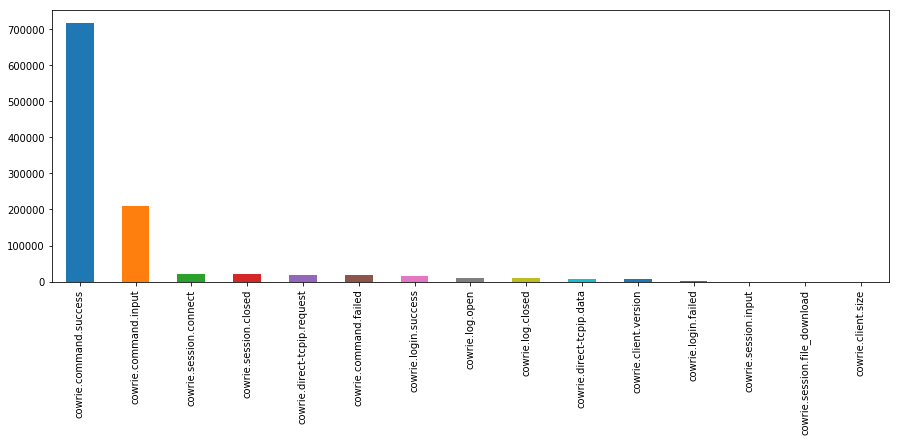

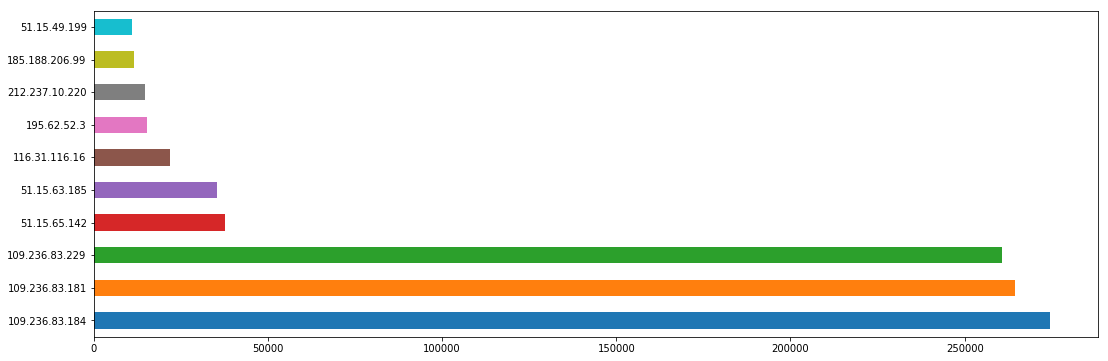

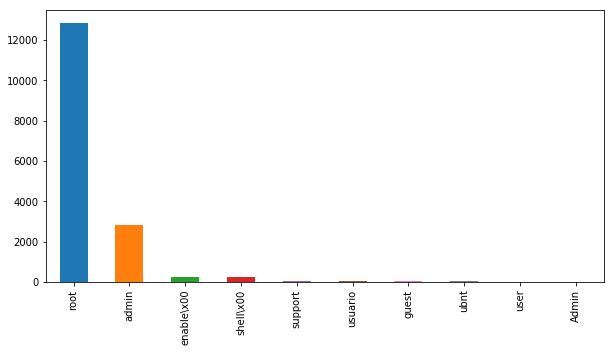

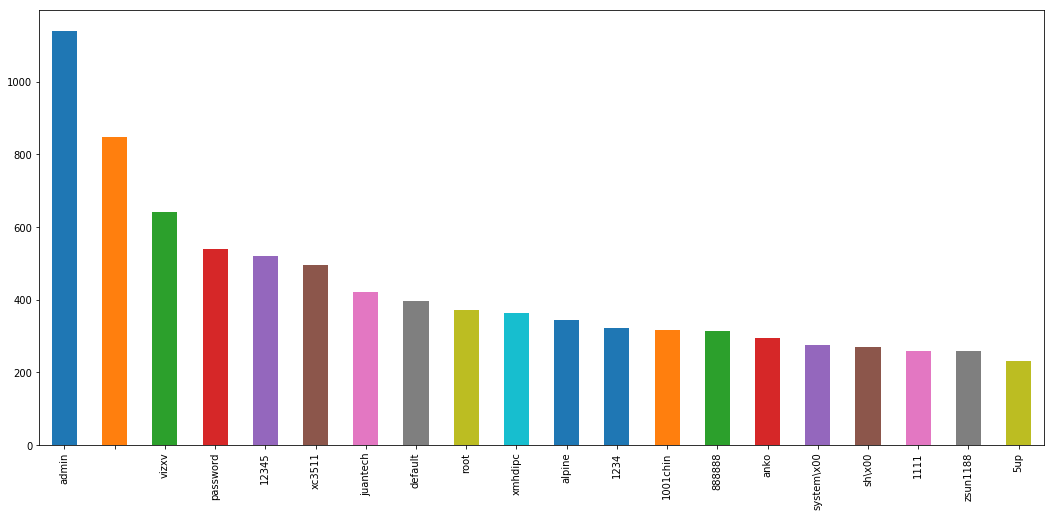

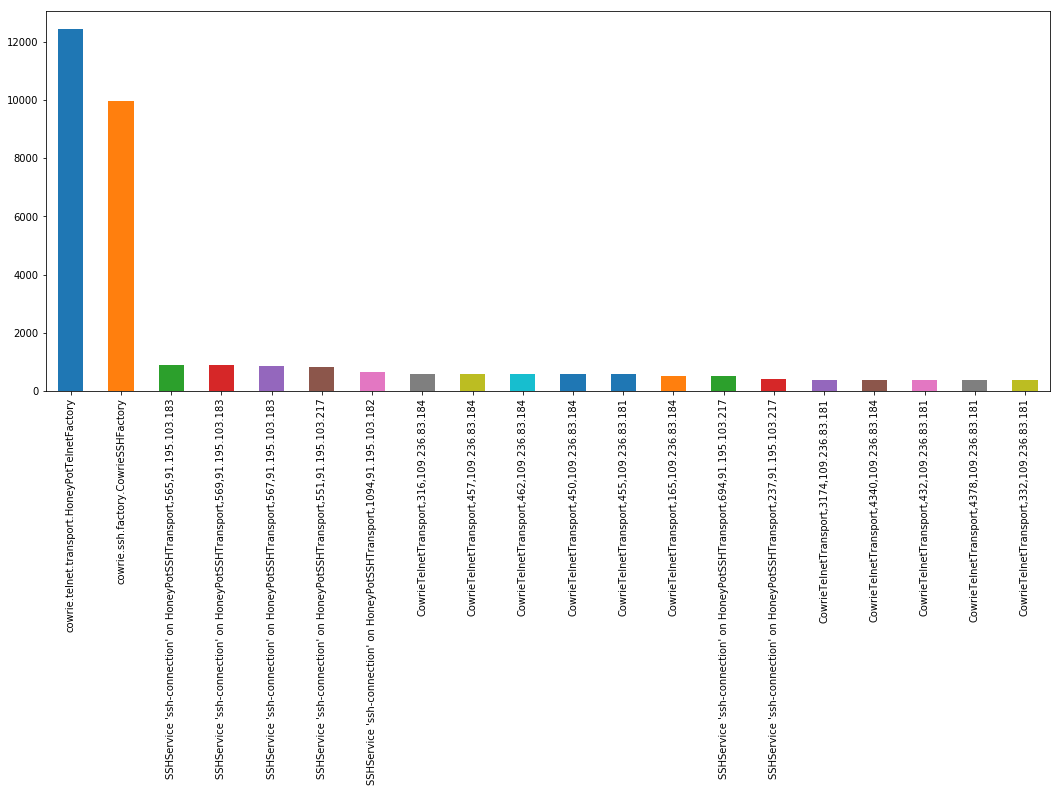

In [4]:
hf.vis(cow_1,cow_3,cow_4)

In [5]:
k = hf.load_pickle('input/seq_events.txt')

pickle loading complete


In [6]:
hf.sample_per_seq(k, 2000)

Top maximum number of sequence length: 

    length  no of samples
0      2.0         5237.0
1      4.0         4959.0
2    199.0         3032.0
3      5.0         1903.0
4      3.0         1481.0
5     71.0          659.0
6     31.0          637.0
7    129.0          625.0
8      6.0          549.0
9     23.0          482.0
10   194.0          443.0
11   197.0          418.0
12    15.0          326.0
13    19.0          306.0
14    69.0          188.0
15    26.0          119.0
16     7.0          114.0
17    16.0          112.0
18    11.0           65.0
19    13.0           65.0


In [7]:
length = 7
data = hf.desired_seq(k, length)

HBox(children=(IntProgress(value=0, max=22449), HTML(value='')))


total samples found: 114

few samples of data of sequence length 7
[[16  1 14 10 10  9 15]
 [16  1 14  0 12 11 15]
 [16  1 14 10 10  9 15]
 [16  1 14  0 12 11 15]
 [16  1 14  0 12 11 15]]


# Hidden Markov Model

In [8]:
N = 17
M = 17
T = length

In [10]:
import hmm

In [11]:
mod = hmm.HMM(N, M, T)

In [12]:
print (mod.train(data))

Update #1 Log Probability: -0.27934403267316404 -- Mean Error 0.0019345392946591726
Update #1 Probability: 0.0002964562439163144
Update #2 Log Probability: -0.03847866615517448 -- Mean Error 0.0006823255520415603
Update #2 Probability: 0.001981060481982576
Update #3 Log Probability: -0.029801955118207494 -- Mean Error 0.0002826934483747414
Update #3 Probability: 0.0032280759528618918
Update #4 Log Probability: -0.02138239126690654 -- Mean Error 0.00025685375738589215
Update #4 Probability: 0.005234716067197131
Update #5 Log Probability: -0.00958501111770157 -- Mean Error 0.00030751778875598115
Update #5 Probability: 0.01035549074599495
Update #6 Log Probability: -0.0006830051882702801 -- Mean Error 7.99629546363739e-05
Update #6 Probability: 0.016883869271910483
Update #7 Log Probability: -2.009575364652713e-06 -- Mean Error 5.782684783315357e-07
Update #7 Probability: 0.017541850298236527
Update #8 Log Probability: -4.5846971455427696e-12 -- Mean Error 3.726090951055871e-18
Update #8 

In [13]:
result,max_prob = hf.calculate_probablity(mod, data)

HBox(children=(IntProgress(value=0, max=114), HTML(value='')))


result samples: 

                          seq  prob
0  [16, 1, 14, 10, 10, 9, 15]   0.0
1  [16, 1, 14, 0, 12, 11, 15]   0.0
2  [16, 1, 14, 10, 10, 9, 15]   0.0
3  [16, 1, 14, 0, 12, 11, 15]   0.0
4  [16, 1, 14, 0, 12, 11, 15]   0.0

 Further analysis of results:  

             prob
count  114.000000
mean     0.017544
std      0.131866
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

 Max probablity sequence: 

seq     [16, 1, 14, 10, 10, 10, 15]
prob                              1
Name: 8, dtype: object


In [16]:
max_prob = [16, 1, 14, 10, 10, 10, 15]

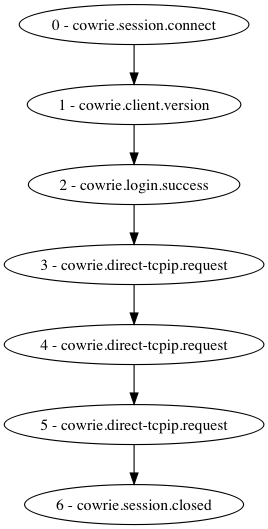

In [17]:
draw(hf.plot_seq(max_prob), show='ipynb')

# Markov Chain 

In [18]:
mod = MarkovChain(states=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [19]:
mod.train(k)

In [20]:
mod.get_probability([16, 1, 14])

0.25082964115440604

In [21]:
mod.transition[3][4]

0.00901770317518075

In [22]:
mod.next_state([12, 1, 10])

10

In [23]:
mod.next_possible_states([12])

([3, 4, 6, 7, 11],
 [0.844379804695616,
  0.0011427384167878663,
  0.0006233118637024725,
  0.00031165593185123624,
  0.15354248909204238])

In [24]:
mod.most_probable_sequence(start=16, length=7)

[16, 14, 12, 3, 8, 8, 8]

In [25]:
mod.gen_random_seq(start=16, length=10)

[16, 1, 15, 16, 15, 16, 1, 14, 0, 11]

In [26]:
mod.transition[16][1]

0.3245030154121063

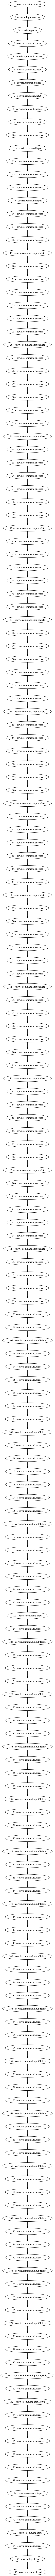

In [30]:
draw(hf.plot_seq(k[1]), show='ipynb')

In [33]:
trans_df = pd.DataFrame(mod.transition)

In [34]:
trans_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008696,0.991304,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055310,0.772966,0.171724,0.0,0.000000,0.000000
2,0.000000,0.000000,0.098055,0.891127,0.000058,0.000288,0.000000,0.001554,0.003798,0.000000,0.000000,0.004431,0.000058,0.000000,0.000000,0.000000,0.0,0.000633,0.000000
3,0.000000,0.000000,0.230996,0.016817,0.009018,0.000570,0.000000,0.000902,0.736161,0.000000,0.000000,0.004651,0.000000,0.000000,0.000000,0.000886,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,0.000000,0.000000,0.005468,0.000000,0.000000,0.000000,0.000000,0.000000,0.994532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,0.000007,0.000000,0.001463,0.053787,0.174468,0.020936,0.000000,0.006771,0.731854,0.000000,0.000000,0.010550,0.000011,0.000000,0.000000,0.000001,0.0,0.000109,0.000042
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337931,0.605687,0.000000,0.000000,0.000000,0.000000,0.056382,0.0,0.000000,0.000000
